In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import gc
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import glob

import warnings
warnings.filterwarnings("ignore")

In [2]:
Num_sensors = 16
HIDDEN_UNITS = 50
NUM_HEADS = 8
NUM_LAYERS = 3
OUTPUT_DIM = 53 #len(class_values)

NUM_EPOCHS = 100
BATCH_SIZE = 256
val_split = 0.2
LEARNING_RATE = 0.001
MOMENTUM = 0.9
class_values = 53

data_processor = utils.build_data(path, Num_sensors)

df = utils.call_data(path)
Node_feature, X_train, y_train, X_test, y_test = utils.data_split(df, ratio=0.2) #test ratio
df.isnull().values.any()

False

In [3]:
graph_generator = config.Graph_Ninapro(df, Num_sensors)

In [4]:
graph1, edges, edge_weights = graph_generator.KNN1()
graph1

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
755589,42711,42719
755590,42711,42720
755591,42712,42719
755592,42712,42720


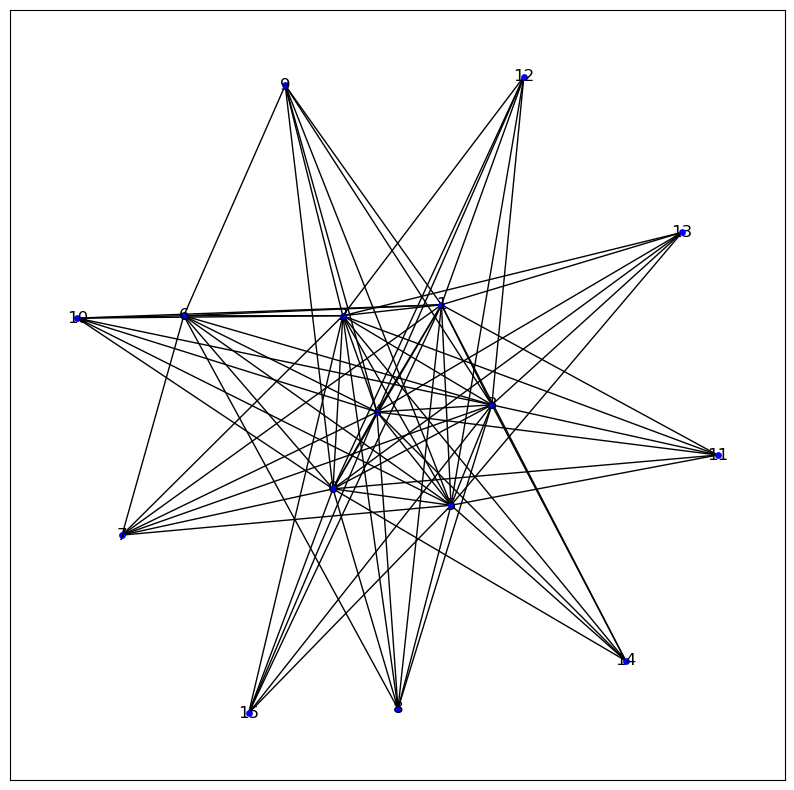

In [5]:
import networkx as nx

plt.figure(figsize=(10, 10))
cora_graph = nx.from_pandas_edgelist(graph1[:100])
nx.draw_networkx(cora_graph, node_size=15, node_color='blue')

In [6]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()

Train data shape: (41913, 401)
Test data shape: (807, 401)


In [7]:
graph_info = (Node_feature, edges, edge_weights) 

In [8]:
print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (755594, 2)
Nodes shape: (42720, 400)


In [9]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(LEARNING_RATE)

In [10]:
accuracy_fn = keras.metrics.SparseCategoricalAccuracy(name="acc")

In [11]:
gat_model = GraphAttentionNetwork(node_features, edges, HIDDEN_UNITS, NUM_HEADS, NUM_LAYERS, OUTPUT_DIM)

gat_model.compile(loss=loss_fn, optimizer=optimizer, metrics=[accuracy_fn])

In [12]:
print("Start training")

all_history = gat_model.fit(
                            X_train, y_train, 
                            validation_data = (X_test, y_test), 
                            batch_size=BATCH_SIZE, 
                            epochs=70, 
                            verbose=1
                           )

Start training
Epoch 1/70
131/131 [==============================] - 116s 564ms/step - loss: 71.3894 - acc: 0.0260 - val_loss: 26.3701 - val_acc: 0.0408
Epoch 2/70
131/131 [==============================] - 67s 509ms/step - loss: 23.7910 - acc: 0.0572 - val_loss: 21.6287 - val_acc: 0.0740
Epoch 3/70
131/131 [==============================] - 66s 505ms/step - loss: 19.1296 - acc: 0.0869 - val_loss: 18.2255 - val_acc: 0.1015
Epoch 4/70
131/131 [==============================] - 66s 506ms/step - loss: 15.4780 - acc: 0.1222 - val_loss: 15.3111 - val_acc: 0.1303
Epoch 5/70
131/131 [==============================] - 66s 503ms/step - loss: 12.7381 - acc: 0.1595 - val_loss: 13.0183 - val_acc: 0.1641
Epoch 6/70
131/131 [==============================] - 66s 501ms/step - loss: 10.3523 - acc: 0.2035 - val_loss: 11.0538 - val_acc: 0.1978
Epoch 7/70
131/131 [==============================] - 66s 507ms/step - loss: 8.5489 - acc: 0.2522 - val_loss: 9.7718 - val_acc: 0.2307
Epoch 8/70
131/131 [=======

131/131 [==============================] - 68s 518ms/step - loss: 0.0661 - acc: 0.9860 - val_loss: 0.7456 - val_acc: 0.9195
Epoch 62/70
131/131 [==============================] - 66s 501ms/step - loss: 0.0562 - acc: 0.9880 - val_loss: 0.3754 - val_acc: 0.9612
Epoch 63/70
131/131 [==============================] - 66s 501ms/step - loss: 0.1297 - acc: 0.9792 - val_loss: 1.1416 - val_acc: 0.8740
Epoch 64/70
131/131 [==============================] - 66s 507ms/step - loss: 0.2740 - acc: 0.9536 - val_loss: 0.4181 - val_acc: 0.9547
Epoch 65/70
131/131 [==============================] - 67s 510ms/step - loss: 0.0785 - acc: 0.9865 - val_loss: 0.5321 - val_acc: 0.9462
Epoch 66/70
131/131 [==============================] - 67s 512ms/step - loss: 0.0530 - acc: 0.9907 - val_loss: 0.3550 - val_acc: 0.9658
Epoch 67/70
131/131 [==============================] - 67s 511ms/step - loss: 0.0173 - acc: 0.9966 - val_loss: 0.3140 - val_acc: 0.9672
Epoch 68/70
131/131 [==============================] - 66s 5

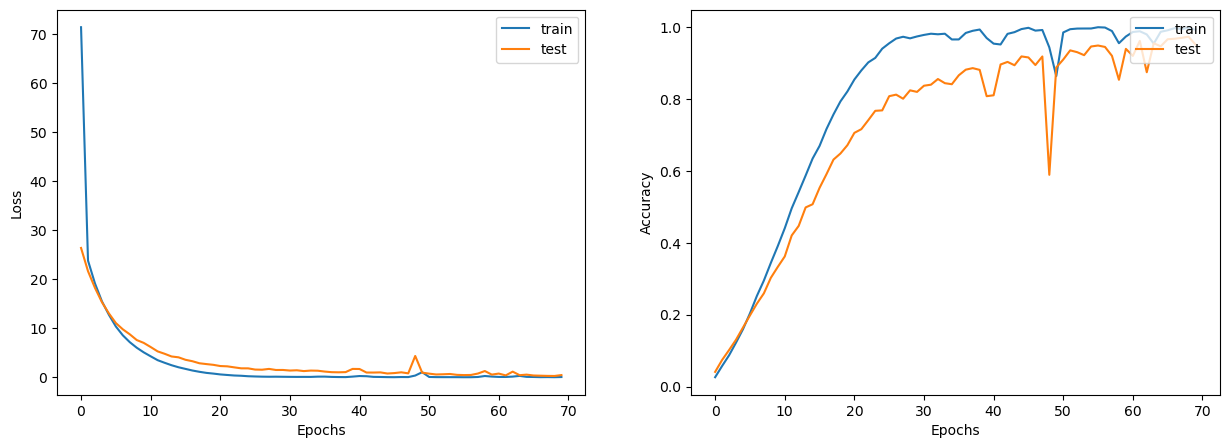

In [13]:
display_learning_curves(all_history)

In [14]:
loss, accuracy = gat_model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

from sklearn.metrics import confusion_matrix

#y_true = np.argmax(y_test, axis=1)
y_true = y_test
y_pred_prob = gat_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
cf = confusion_matrix(y_true, y_pred)
cf_new = []

for i in range(len(cf)):
    sums = np.sum(cf[i])
    cf_new.append([cf[i][j]/sums for j in range(len(cf[i]))]) 

262/262 [==============================] - 26s 97ms/step - loss: 0.4408 - acc: 0.9511
Test Loss: 0.440767377614975
Test Accuracy: 0.951091468334198
262/262 [==============================] - 31s 96ms/step


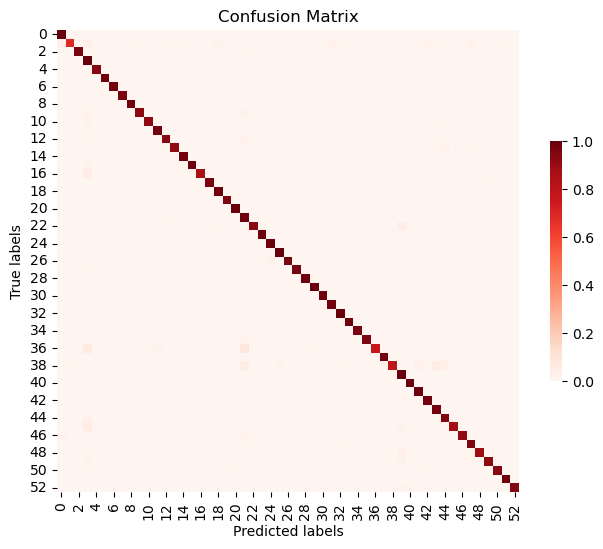

In [15]:
cmap_ = "Reds"  #mako

plt.figure(figsize=(8, 6))
#sns.heatmap(db3, ax=ax1, cbar=True, cmap=cmap_, square=True, cbar_kws={"shrink": .52})
sns.heatmap(cf_new, cmap=cmap_, cbar=True, square=True, cbar_kws={"shrink": .52})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
pd.DataFrame(cf_new).to_csv('./GAT_FC_SW_DB5_confusion_matrix.csv', index=False)